In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
n_sensors = 5
#n_sensors = 10
#n_sensors = 15

In [3]:
os.chdir('E:\\MLdataset')

In [4]:
x_csv = pd.read_csv('x_5degree_1rev.csv',header=None)

In [5]:
x_csv = x_csv.to_numpy(dtype='float32')

In [6]:
x_5degree = x_csv[:, 0:5]

In [7]:
x_5degree.shape

(438, 5)

In [8]:
x = x_5degree.reshape((73*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [10]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [11]:
y = y_5degree.reshape((73*6, 100, 100))

In [12]:
tsr = x_csv[:, -2]

In [13]:
theta = x_csv[:, -1]

In [14]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [15]:
print(y_train.shape)

(394, 100, 100)


In [16]:
print(y_test.shape)

(44, 100, 100)


In [17]:
print(x_train.shape)

(394, 5, 1)


In [18]:
print(x_test.shape)

(44, 5, 1)


In [19]:
theta_train

array([ 40., 165.,  55., 325.,  20., 155.,  90.,  75.,  75., 265.,   0.,
        95., 305., 350., 280.,   5., 245., 100., 185., 330., 325.,  30.,
       125.,   0., 255., 200., 210.,  95., 250., 230., 100., 255.,  65.,
       110., 230.,  85., 130., 215., 300., 285., 320., 120.,  85., 330.,
       230., 205., 155.,  55.,  65., 135., 105.,  40., 320.,  30., 315.,
       265., 270.,  25., 225.,  10., 315.,  60., 280.,  80., 195., 220.,
       220.,  15.,  90., 110., 300., 110., 320., 315., 185., 290., 330.,
       145., 335., 325.,  50., 130.,  35., 150., 160., 175., 130., 215.,
       225., 205., 340., 315., 160., 210., 260., 305., 120., 145., 300.,
       170., 265., 180., 330., 360.,  90.,  80., 165.,  50., 210., 130.,
         5., 295., 110., 230., 245., 115., 235., 140., 310., 245.,  45.,
       220.,  15., 180., 330., 140., 190., 100., 170., 295., 190., 250.,
       310.,  30., 120.,  50.,  60.,  20., 155.,  50.,  60., 150.,  40.,
       150., 275., 105., 225., 200., 150.,  60., 32

In [20]:
tsr_train

array([1.7, 1.5, 1.7, 1.9, 1.6, 1.8, 2. , 1.5, 2. , 1.6, 1.5, 1.5, 1.8,
       1.8, 1.5, 1.8, 1.9, 1.6, 1.9, 1.8, 1.8, 2. , 1.5, 2. , 2. , 1.6,
       1.5, 1.7, 2. , 2. , 1.9, 1.6, 1.9, 1.5, 1.5, 1.6, 1.8, 1.6, 2. ,
       1.5, 1.6, 1.5, 1.5, 1.5, 1.8, 2. , 1.5, 1.6, 2. , 1.7, 1.6, 1.8,
       2. , 1.7, 1.9, 1.8, 2. , 1.5, 1.5, 1.7, 2. , 2. , 1.8, 1.5, 2. ,
       1.6, 2. , 1.5, 1.5, 1.7, 1.5, 1.9, 1.9, 1.5, 1.6, 1.8, 1.9, 1.5,
       1.6, 1.7, 1.8, 1.5, 1.5, 1.7, 2. , 1.6, 1.9, 2. , 1.6, 1.6, 1.6,
       1.7, 1.9, 1.9, 1.7, 2. , 2. , 1.9, 1.9, 1.7, 1.7, 1.6, 2. , 1.6,
       1.8, 2. , 2. , 1.6, 2. , 1.7, 1.6, 1.9, 2. , 1.6, 2. , 2. , 1.7,
       1.8, 1.8, 1.7, 1.9, 1.9, 1.8, 1.5, 1.6, 1.9, 1.7, 1.8, 1.8, 1.5,
       1.6, 1.7, 1.7, 1.5, 1.9, 1.9, 1.7, 1.7, 1.7, 1.5, 1.8, 1.6, 1.6,
       1.8, 1.8, 1.7, 2. , 2. , 1.9, 1.9, 1.7, 1.7, 1.6, 2. , 1.7, 1.7,
       1.7, 1.5, 1.6, 1.5, 2. , 1.6, 1.9, 1.6, 1.6, 1.9, 1.8, 1.6, 2. ,
       1.5, 1.5, 1.5, 1.6, 1.6, 2. , 1.7, 1.7, 1.5, 2. , 1.8, 2.

In [21]:
os.chdir('C:\\Users\\User')

In [22]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [23]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 5)                 0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               3072      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             513000

In [24]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [25]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
10/10 [==============================] - 1s 6ms/step - loss: 0.0110 - rmse: 0.1041
Epoch 2/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0109 - rmse: 0.1036
Epoch 3/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0108 - rmse: 0.1029
Epoch 4/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.1020
Epoch 5/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0102 - rmse: 0.1001
Epoch 6/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0094 - rmse: 0.0961
Epoch 7/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0081 - rmse: 0.0892
Epoch 8/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0075 - rmse: 0.0858
Epoch 9/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0843
Epoch 10/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0839
Epoch 11/10000
10/10 [=======

10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0625
Epoch 85/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0623
Epoch 86/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0620
Epoch 87/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0619
Epoch 88/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0617
Epoch 89/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0615
Epoch 90/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0615
Epoch 91/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0613
Epoch 92/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0610
Epoch 93/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0609
Epoch 94/10000
10/10 [=============

10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0485
Epoch 168/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0483
Epoch 169/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0482
Epoch 170/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0481
Epoch 171/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0480
Epoch 172/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0480
Epoch 173/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0479
Epoch 174/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0475
Epoch 175/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0474
Epoch 176/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0475
Epoch 177/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0380
Epoch 250/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0379
Epoch 251/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0378
Epoch 252/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0378
Epoch 253/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0378
Epoch 254/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0377
Epoch 255/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0374
Epoch 256/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0374
Epoch 257/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0373
Epoch 258/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0374
Epoch 259/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0301
Epoch 332/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0300
Epoch 333/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0300
Epoch 334/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0299
Epoch 335/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0297
Epoch 336/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0296
Epoch 337/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0297
Epoch 338/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0295
Epoch 339/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0295
Epoch 340/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0294
Epoch 341/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 7.7733e-04 - rmse: 0.0246
Epoch 412/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7945e-04 - rmse: 0.0246
Epoch 413/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8140e-04 - rmse: 0.0247
Epoch 414/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7149e-04 - rmse: 0.0245
Epoch 415/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7157e-04 - rmse: 0.0245
Epoch 416/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6824e-04 - rmse: 0.0244
Epoch 417/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6544e-04 - rmse: 0.0243
Epoch 418/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.6298e-04 - rmse: 0.0243
Epoch 419/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6107e-04 - rmse: 0.0242
Epoch 420/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5106e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 6.0081e-04 - rmse: 0.0206
Epoch 491/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9833e-04 - rmse: 0.0206
Epoch 492/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9457e-04 - rmse: 0.0205
Epoch 493/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9397e-04 - rmse: 0.0205
Epoch 494/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9405e-04 - rmse: 0.0205
Epoch 495/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9609e-04 - rmse: 0.0205
Epoch 496/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0118e-04 - rmse: 0.0207
Epoch 497/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9644e-04 - rmse: 0.0205
Epoch 498/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9016e-04 - rmse: 0.0204
Epoch 499/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8536e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 4.8744e-04 - rmse: 0.0177
Epoch 570/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9040e-04 - rmse: 0.0178
Epoch 571/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9489e-04 - rmse: 0.0179
Epoch 572/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9604e-04 - rmse: 0.0179
Epoch 573/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8783e-04 - rmse: 0.0177
Epoch 574/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8751e-04 - rmse: 0.0177
Epoch 575/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8062e-04 - rmse: 0.0175
Epoch 576/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8053e-04 - rmse: 0.0175
Epoch 577/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7916e-04 - rmse: 0.0174
Epoch 578/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7425e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 4.0536e-04 - rmse: 0.0152
Epoch 649/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0640e-04 - rmse: 0.0152
Epoch 650/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0668e-04 - rmse: 0.0152
Epoch 651/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0746e-04 - rmse: 0.0153
Epoch 652/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0309e-04 - rmse: 0.0151
Epoch 653/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0189e-04 - rmse: 0.0151
Epoch 654/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0159e-04 - rmse: 0.0151
Epoch 655/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0045e-04 - rmse: 0.0150
Epoch 656/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.9642e-04 - rmse: 0.0149
Epoch 657/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.9710e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 3.5052e-04 - rmse: 0.0133
Epoch 728/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4970e-04 - rmse: 0.0133
Epoch 729/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5126e-04 - rmse: 0.0133
Epoch 730/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4999e-04 - rmse: 0.0133
Epoch 731/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4624e-04 - rmse: 0.0131
Epoch 732/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4512e-04 - rmse: 0.0131
Epoch 733/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4484e-04 - rmse: 0.0131
Epoch 734/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4638e-04 - rmse: 0.0132
Epoch 735/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4541e-04 - rmse: 0.0131
Epoch 736/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4413e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 3.0875e-04 - rmse: 0.0117
Epoch 807/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1090e-04 - rmse: 0.0118
Epoch 808/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0881e-04 - rmse: 0.0117
Epoch 809/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0802e-04 - rmse: 0.0117
Epoch 810/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0893e-04 - rmse: 0.0117
Epoch 811/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0882e-04 - rmse: 0.0117
Epoch 812/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0662e-04 - rmse: 0.0116
Epoch 813/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0653e-04 - rmse: 0.0116
Epoch 814/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0557e-04 - rmse: 0.0116
Epoch 815/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0715e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 2.8480e-04 - rmse: 0.0107
Epoch 886/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8363e-04 - rmse: 0.0107
Epoch 887/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8157e-04 - rmse: 0.0106
Epoch 888/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7981e-04 - rmse: 0.0105
Epoch 889/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7819e-04 - rmse: 0.0104
Epoch 890/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7702e-04 - rmse: 0.0104
Epoch 891/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7692e-04 - rmse: 0.0104
Epoch 892/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7595e-04 - rmse: 0.0103
Epoch 893/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7504e-04 - rmse: 0.0103
Epoch 894/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7561e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 2.5732e-04 - rmse: 0.0095
Epoch 965/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5723e-04 - rmse: 0.0095
Epoch 966/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5666e-04 - rmse: 0.0095
Epoch 967/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5594e-04 - rmse: 0.0094
Epoch 968/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5711e-04 - rmse: 0.0095
Epoch 969/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5754e-04 - rmse: 0.0095
Epoch 970/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5524e-04 - rmse: 0.0094
Epoch 971/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5520e-04 - rmse: 0.0094
Epoch 972/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5485e-04 - rmse: 0.0094
Epoch 973/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5417e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 2.4107e-04 - rmse: 0.0088
Epoch 1044/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3984e-04 - rmse: 0.0087
Epoch 1045/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4038e-04 - rmse: 0.0087
Epoch 1046/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4072e-04 - rmse: 0.0088
Epoch 1047/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4156e-04 - rmse: 0.0088
Epoch 1048/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4274e-04 - rmse: 0.0089
Epoch 1049/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4099e-04 - rmse: 0.0088
Epoch 1050/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4044e-04 - rmse: 0.0088
Epoch 1051/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3897e-04 - rmse: 0.0087
Epoch 1052/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.2617e-04 - rmse: 0.0081
Epoch 1122/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.2434e-04 - rmse: 0.0080
Epoch 1123/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2372e-04 - rmse: 0.0079
Epoch 1124/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2409e-04 - rmse: 0.0080
Epoch 1125/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.2448e-04 - rmse: 0.0080
Epoch 1126/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2403e-04 - rmse: 0.0080
Epoch 1127/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2459e-04 - rmse: 0.0080
Epoch 1128/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2473e-04 - rmse: 0.0080
Epoch 1129/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2524e-04 - rmse: 0.0080
Epoch 1130/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2

10/10 [==============================] - 0s 5ms/step - loss: 2.1173e-04 - rmse: 0.0073
Epoch 1200/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.1050e-04 - rmse: 0.0073
Epoch 1201/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1114e-04 - rmse: 0.0073
Epoch 1202/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1184e-04 - rmse: 0.0074
Epoch 1203/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1122e-04 - rmse: 0.0073
Epoch 1204/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1128e-04 - rmse: 0.0073
Epoch 1205/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1188e-04 - rmse: 0.0074
Epoch 1206/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1237e-04 - rmse: 0.0074
Epoch 1207/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1281e-04 - rmse: 0.0074
Epoch 1208/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1

10/10 [==============================] - 0s 5ms/step - loss: 2.0303e-04 - rmse: 0.0070
Epoch 1278/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0242e-04 - rmse: 0.0069
Epoch 1279/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0205e-04 - rmse: 0.0069
Epoch 1280/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0276e-04 - rmse: 0.0070
Epoch 1281/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0315e-04 - rmse: 0.0070
Epoch 1282/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0267e-04 - rmse: 0.0070
Epoch 1283/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0335e-04 - rmse: 0.0070
Epoch 1284/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0379e-04 - rmse: 0.0070
Epoch 1285/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0291e-04 - rmse: 0.0070
Epoch 1286/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0

10/10 [==============================] - 0s 5ms/step - loss: 1.9538e-04 - rmse: 0.0066
Epoch 1356/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.9390e-04 - rmse: 0.0065
Epoch 1357/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9254e-04 - rmse: 0.0064
Epoch 1358/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9364e-04 - rmse: 0.0065
Epoch 1359/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.9298e-04 - rmse: 0.0065
Epoch 1360/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9375e-04 - rmse: 0.0065
Epoch 1361/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9346e-04 - rmse: 0.0065
Epoch 1362/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9328e-04 - rmse: 0.0065
Epoch 1363/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9435e-04 - rmse: 0.0066
Epoch 1364/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9

10/10 [==============================] - 0s 5ms/step - loss: 1.8931e-04 - rmse: 0.0064
Epoch 1434/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8768e-04 - rmse: 0.0063
Epoch 1435/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8573e-04 - rmse: 0.0061
Epoch 1436/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8720e-04 - rmse: 0.0062
Epoch 1437/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8581e-04 - rmse: 0.0061
Epoch 1438/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8572e-04 - rmse: 0.0061
Epoch 1439/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8497e-04 - rmse: 0.0061
Epoch 1440/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8608e-04 - rmse: 0.0062
Epoch 1441/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8567e-04 - rmse: 0.0061
Epoch 1442/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8

10/10 [==============================] - 0s 5ms/step - loss: 1.8391e-04 - rmse: 0.0062
Epoch 1512/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8299e-04 - rmse: 0.0061
Epoch 1513/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8088e-04 - rmse: 0.0060
Epoch 1514/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7944e-04 - rmse: 0.0059
Epoch 1515/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7942e-04 - rmse: 0.0059
Epoch 1516/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7909e-04 - rmse: 0.0058
Epoch 1517/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7967e-04 - rmse: 0.0059
Epoch 1518/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7921e-04 - rmse: 0.0058
Epoch 1519/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7857e-04 - rmse: 0.0058
Epoch 1520/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7

10/10 [==============================] - 0s 5ms/step - loss: 1.7634e-04 - rmse: 0.0058
Epoch 1590/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7920e-04 - rmse: 0.0061
Epoch 1591/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7718e-04 - rmse: 0.0059
Epoch 1592/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7526e-04 - rmse: 0.0058
Epoch 1593/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7387e-04 - rmse: 0.0056
Epoch 1594/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7245e-04 - rmse: 0.0055
Epoch 1595/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7220e-04 - rmse: 0.0055
Epoch 1596/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7283e-04 - rmse: 0.0056
Epoch 1597/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7415e-04 - rmse: 0.0057
Epoch 1598/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7

10/10 [==============================] - 0s 5ms/step - loss: 1.6788e-04 - rmse: 0.0053
Epoch 1668/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6814e-04 - rmse: 0.0054
Epoch 1669/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6857e-04 - rmse: 0.0054
Epoch 1670/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6682e-04 - rmse: 0.0053
Epoch 1671/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6678e-04 - rmse: 0.0053
Epoch 1672/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6721e-04 - rmse: 0.0053
Epoch 1673/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6833e-04 - rmse: 0.0054
Epoch 1674/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6735e-04 - rmse: 0.0053
Epoch 1675/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6892e-04 - rmse: 0.0055
Epoch 1676/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6

10/10 [==============================] - 0s 5ms/step - loss: 1.6461e-04 - rmse: 0.0053
Epoch 1746/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6379e-04 - rmse: 0.0052
Epoch 1747/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6353e-04 - rmse: 0.0052
Epoch 1748/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6368e-04 - rmse: 0.0052
Epoch 1749/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6472e-04 - rmse: 0.0053
Epoch 1750/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6226e-04 - rmse: 0.0051
Epoch 1751/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6151e-04 - rmse: 0.0050
Epoch 1752/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6085e-04 - rmse: 0.0050
Epoch 1753/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6151e-04 - rmse: 0.0050
Epoch 1754/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6

10/10 [==============================] - 0s 5ms/step - loss: 1.5958e-04 - rmse: 0.0051
Epoch 1824/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6049e-04 - rmse: 0.0052
Epoch 1825/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5875e-04 - rmse: 0.0050
Epoch 1826/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5811e-04 - rmse: 0.0050
Epoch 1827/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5782e-04 - rmse: 0.0049
Epoch 1828/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5845e-04 - rmse: 0.0050
Epoch 1829/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5708e-04 - rmse: 0.0049
Epoch 1830/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5883e-04 - rmse: 0.0050
Epoch 1831/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6027e-04 - rmse: 0.0052
Epoch 1832/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6

10/10 [==============================] - 0s 5ms/step - loss: 1.5485e-04 - rmse: 0.0049
Epoch 1902/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5606e-04 - rmse: 0.0050
Epoch 1903/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5534e-04 - rmse: 0.0049
Epoch 1904/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5422e-04 - rmse: 0.0048
Epoch 1905/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5354e-04 - rmse: 0.0048
Epoch 1906/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5406e-04 - rmse: 0.0048
Epoch 1907/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5425e-04 - rmse: 0.0048
Epoch 1908/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5442e-04 - rmse: 0.0049
Epoch 1909/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5416e-04 - rmse: 0.0048
Epoch 1910/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5

10/10 [==============================] - 0s 6ms/step - loss: 1.4995e-04 - rmse: 0.0046
Epoch 1980/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4838e-04 - rmse: 0.0045
Epoch 1981/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4942e-04 - rmse: 0.0046
Epoch 1982/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5121e-04 - rmse: 0.0048
Epoch 1983/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4954e-04 - rmse: 0.0046
Epoch 1984/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4901e-04 - rmse: 0.0046
Epoch 1985/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4918e-04 - rmse: 0.0046
Epoch 1986/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4881e-04 - rmse: 0.0045
Epoch 1987/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4939e-04 - rmse: 0.0046
Epoch 1988/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4

10/10 [==============================] - 0s 5ms/step - loss: 1.4705e-04 - rmse: 0.0046
Epoch 2058/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4815e-04 - rmse: 0.0047
Epoch 2059/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4707e-04 - rmse: 0.0046
Epoch 2060/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4675e-04 - rmse: 0.0046
Epoch 2061/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4563e-04 - rmse: 0.0045
Epoch 2062/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4594e-04 - rmse: 0.0045
Epoch 2063/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4691e-04 - rmse: 0.0046
Epoch 2064/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4583e-04 - rmse: 0.0045
Epoch 2065/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4477e-04 - rmse: 0.0044
Epoch 2066/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4

10/10 [==============================] - 0s 5ms/step - loss: 1.4350e-04 - rmse: 0.0045
Epoch 2136/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4403e-04 - rmse: 0.0045
Epoch 2137/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4298e-04 - rmse: 0.0044
Epoch 2138/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4304e-04 - rmse: 0.0044
Epoch 2139/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4318e-04 - rmse: 0.0045
Epoch 2140/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4306e-04 - rmse: 0.0044
Epoch 2141/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4185e-04 - rmse: 0.0043
Epoch 2142/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4133e-04 - rmse: 0.0042
Epoch 2143/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4134e-04 - rmse: 0.0043
Epoch 2144/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4

10/10 [==============================] - 0s 5ms/step - loss: 1.3827e-04 - rmse: 0.0041
Epoch 2214/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3828e-04 - rmse: 0.0041
Epoch 2215/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3715e-04 - rmse: 0.0040
Epoch 2216/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3656e-04 - rmse: 0.0039
Epoch 2217/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3702e-04 - rmse: 0.0040
Epoch 2218/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3787e-04 - rmse: 0.0041
Epoch 2219/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3900e-04 - rmse: 0.0042
Epoch 2220/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3866e-04 - rmse: 0.0042
Epoch 2221/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4031e-04 - rmse: 0.0044
Epoch 2222/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3

10/10 [==============================] - 0s 6ms/step - loss: 1.4114e-04 - rmse: 0.0047
Epoch 2292/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4150e-04 - rmse: 0.0048
Epoch 2293/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3845e-04 - rmse: 0.0044
Epoch 2294/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3579e-04 - rmse: 0.0041
Epoch 2295/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3652e-04 - rmse: 0.0042
Epoch 2296/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3677e-04 - rmse: 0.0042
Epoch 2297/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3515e-04 - rmse: 0.0041
Epoch 2298/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3417e-04 - rmse: 0.0039
Epoch 2299/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3358e-04 - rmse: 0.0039
Epoch 2300/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3

10/10 [==============================] - 0s 5ms/step - loss: 1.3285e-04 - rmse: 0.0040
Epoch 2370/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3220e-04 - rmse: 0.0039
Epoch 2371/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3183e-04 - rmse: 0.0039
Epoch 2372/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3090e-04 - rmse: 0.0038
Epoch 2373/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3109e-04 - rmse: 0.0038
Epoch 2374/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3109e-04 - rmse: 0.0038
Epoch 2375/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3435e-04 - rmse: 0.0042
Epoch 2376/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3398e-04 - rmse: 0.0042
Epoch 2377/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3258e-04 - rmse: 0.0040
Epoch 2378/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3

10/10 [==============================] - 0s 5ms/step - loss: 1.3030e-04 - rmse: 0.0040
Epoch 2448/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2999e-04 - rmse: 0.0039
Epoch 2449/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2939e-04 - rmse: 0.0039
Epoch 2450/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2972e-04 - rmse: 0.0039
Epoch 2451/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2981e-04 - rmse: 0.0039
Epoch 2452/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3145e-04 - rmse: 0.0041
Epoch 2453/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3192e-04 - rmse: 0.0042
Epoch 2454/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3153e-04 - rmse: 0.0041
Epoch 2455/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3096e-04 - rmse: 0.0041
Epoch 2456/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 6ms/step - loss: 1.2680e-04 - rmse: 0.0038
Epoch 2526/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2684e-04 - rmse: 0.0038
Epoch 2527/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2765e-04 - rmse: 0.0039
Epoch 2528/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2717e-04 - rmse: 0.0038
Epoch 2529/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2741e-04 - rmse: 0.0039
Epoch 2530/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2776e-04 - rmse: 0.0039
Epoch 2531/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2704e-04 - rmse: 0.0038
Epoch 2532/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2631e-04 - rmse: 0.0038
Epoch 2533/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2541e-04 - rmse: 0.0036
Epoch 2534/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.2470e-04 - rmse: 0.0038
Epoch 2604/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2435e-04 - rmse: 0.0037
Epoch 2605/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2453e-04 - rmse: 0.0038
Epoch 2606/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2548e-04 - rmse: 0.0039
Epoch 2607/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2751e-04 - rmse: 0.0041
Epoch 2608/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2733e-04 - rmse: 0.0041
Epoch 2609/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2580e-04 - rmse: 0.0039
Epoch 2610/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2475e-04 - rmse: 0.0038
Epoch 2611/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2611e-04 - rmse: 0.0040
Epoch 2612/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2

10/10 [==============================] - 0s 6ms/step - loss: 1.2197e-04 - rmse: 0.0037
Epoch 2682/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2262e-04 - rmse: 0.0038
Epoch 2683/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2317e-04 - rmse: 0.0038
Epoch 2684/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2388e-04 - rmse: 0.0039
Epoch 2685/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2594e-04 - rmse: 0.0042
Epoch 2686/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2756e-04 - rmse: 0.0044
Epoch 2687/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2564e-04 - rmse: 0.0042
Epoch 2688/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2451e-04 - rmse: 0.0040
Epoch 2689/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2337e-04 - rmse: 0.0039
Epoch 2690/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.2563e-04 - rmse: 0.0044
Epoch 2760/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2428e-04 - rmse: 0.0042
Epoch 2761/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2426e-04 - rmse: 0.0042
Epoch 2762/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2205e-04 - rmse: 0.0039
Epoch 2763/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2197e-04 - rmse: 0.0039
Epoch 2764/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2394e-04 - rmse: 0.0042
Epoch 2765/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2299e-04 - rmse: 0.0041
Epoch 2766/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2168e-04 - rmse: 0.0039
Epoch 2767/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2018e-04 - rmse: 0.0037
Epoch 2768/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1821e-04 - rmse: 0.0037
Epoch 2838/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1857e-04 - rmse: 0.0037
Epoch 2839/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1825e-04 - rmse: 0.0037
Epoch 2840/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1713e-04 - rmse: 0.0035
Epoch 2841/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1641e-04 - rmse: 0.0034
Epoch 2842/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1665e-04 - rmse: 0.0035
Epoch 2843/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1624e-04 - rmse: 0.0034
Epoch 2844/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1560e-04 - rmse: 0.0033
Epoch 2845/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1658e-04 - rmse: 0.0035
Epoch 2846/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1690e-04 - rmse: 0.0037
Epoch 2916/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1744e-04 - rmse: 0.0038
Epoch 2917/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1765e-04 - rmse: 0.0038
Epoch 2918/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1650e-04 - rmse: 0.0037
Epoch 2919/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1534e-04 - rmse: 0.0035
Epoch 2920/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1466e-04 - rmse: 0.0034
Epoch 2921/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1423e-04 - rmse: 0.0034
Epoch 2922/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1581e-04 - rmse: 0.0036
Epoch 2923/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1620e-04 - rmse: 0.0036
Epoch 2924/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1304e-04 - rmse: 0.0034
Epoch 2994/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1270e-04 - rmse: 0.0034
Epoch 2995/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1356e-04 - rmse: 0.0035
Epoch 2996/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1344e-04 - rmse: 0.0035
Epoch 2997/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1280e-04 - rmse: 0.0034
Epoch 2998/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1356e-04 - rmse: 0.0035
Epoch 2999/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1380e-04 - rmse: 0.0035
Epoch 3000/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1480e-04 - rmse: 0.0037
Epoch 3001/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1692e-04 - rmse: 0.0040
Epoch 3002/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1027e-04 - rmse: 0.0032
Epoch 3072/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1080e-04 - rmse: 0.0033
Epoch 3073/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1041e-04 - rmse: 0.0033
Epoch 3074/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1262e-04 - rmse: 0.0036
Epoch 3075/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1388e-04 - rmse: 0.0038
Epoch 3076/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1600e-04 - rmse: 0.0040
Epoch 3077/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1706e-04 - rmse: 0.0042
Epoch 3078/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1625e-04 - rmse: 0.0041
Epoch 3079/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1608e-04 - rmse: 0.0041
Epoch 3080/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1019e-04 - rmse: 0.0035
Epoch 3150/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1159e-04 - rmse: 0.0037
Epoch 3151/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1365e-04 - rmse: 0.0039
Epoch 3152/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1168e-04 - rmse: 0.0037
Epoch 3153/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0965e-04 - rmse: 0.0034
Epoch 3154/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0965e-04 - rmse: 0.0034
Epoch 3155/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0955e-04 - rmse: 0.0034
Epoch 3156/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0932e-04 - rmse: 0.0034
Epoch 3157/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0908e-04 - rmse: 0.0033
Epoch 3158/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 6ms/step - loss: 1.0717e-04 - rmse: 0.0032
Epoch 3228/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0738e-04 - rmse: 0.0033
Epoch 3229/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0736e-04 - rmse: 0.0033
Epoch 3230/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0685e-04 - rmse: 0.0032
Epoch 3231/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0659e-04 - rmse: 0.0032
Epoch 3232/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0749e-04 - rmse: 0.0033
Epoch 3233/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0713e-04 - rmse: 0.0033
Epoch 3234/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0751e-04 - rmse: 0.0033
Epoch 3235/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0736e-04 - rmse: 0.0033
Epoch 3236/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0459e-04 - rmse: 0.0031
Epoch 3306/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0459e-04 - rmse: 0.0031
Epoch 3307/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0532e-04 - rmse: 0.0032
Epoch 3308/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0550e-04 - rmse: 0.0032
Epoch 3309/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0510e-04 - rmse: 0.0032
Epoch 3310/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0528e-04 - rmse: 0.0032
Epoch 3311/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0569e-04 - rmse: 0.0033
Epoch 3312/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0518e-04 - rmse: 0.0032
Epoch 3313/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0440e-04 - rmse: 0.0031
Epoch 3314/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 6ms/step - loss: 1.0773e-04 - rmse: 0.0038
Epoch 3384/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0663e-04 - rmse: 0.0036
Epoch 3385/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0440e-04 - rmse: 0.0033
Epoch 3386/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0472e-04 - rmse: 0.0033
Epoch 3387/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0386e-04 - rmse: 0.0032
Epoch 3388/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0512e-04 - rmse: 0.0034
Epoch 3389/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0788e-04 - rmse: 0.0038
Epoch 3390/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0554e-04 - rmse: 0.0035
Epoch 3391/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0616e-04 - rmse: 0.0036
Epoch 3392/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 6ms/step - loss: 1.0188e-04 - rmse: 0.0031
Epoch 3462/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0175e-04 - rmse: 0.0031
Epoch 3463/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0225e-04 - rmse: 0.0032
Epoch 3464/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0192e-04 - rmse: 0.0031
Epoch 3465/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0139e-04 - rmse: 0.0030
Epoch 3466/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0527e-04 - rmse: 0.0036
Epoch 3467/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1004e-04 - rmse: 0.0042
Epoch 3468/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0711e-04 - rmse: 0.0039
Epoch 3469/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0631e-04 - rmse: 0.0038
Epoch 3470/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0146e-04 - rmse: 0.0033
Epoch 3540/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0174e-04 - rmse: 0.0033
Epoch 3541/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0045e-04 - rmse: 0.0031
Epoch 3542/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0015e-04 - rmse: 0.0031
Epoch 3543/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0232e-04 - rmse: 0.0034
Epoch 3544/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0175e-04 - rmse: 0.0033
Epoch 3545/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0270e-04 - rmse: 0.0035
Epoch 3546/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0109e-04 - rmse: 0.0032
Epoch 3547/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0080e-04 - rmse: 0.0032
Epoch 3548/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0030e-04 - rmse: 0.0033
Epoch 3618/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0062e-04 - rmse: 0.0033
Epoch 3619/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0063e-04 - rmse: 0.0033
Epoch 3620/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9422e-05 - rmse: 0.0032
Epoch 3621/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8121e-05 - rmse: 0.0030
Epoch 3622/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8169e-05 - rmse: 0.0030
Epoch 3623/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7782e-05 - rmse: 0.0029
Epoch 3624/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8312e-05 - rmse: 0.0030
Epoch 3625/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8976e-05 - rmse: 0.0031
Epoch 3626/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8

10/10 [==============================] - 0s 5ms/step - loss: 9.6431e-05 - rmse: 0.0029
Epoch 3696/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6645e-05 - rmse: 0.0029
Epoch 3697/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6365e-05 - rmse: 0.0029
Epoch 3698/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7108e-05 - rmse: 0.0030
Epoch 3699/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6335e-05 - rmse: 0.0029
Epoch 3700/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6611e-05 - rmse: 0.0029
Epoch 3701/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7329e-05 - rmse: 0.0030
Epoch 3702/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6747e-05 - rmse: 0.0029
Epoch 3703/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6678e-05 - rmse: 0.0029
Epoch 3704/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.6

10/10 [==============================] - 0s 5ms/step - loss: 9.6532e-05 - rmse: 0.0031
Epoch 3774/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.5498e-05 - rmse: 0.0029
Epoch 3775/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5507e-05 - rmse: 0.0029
Epoch 3776/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5512e-05 - rmse: 0.0029
Epoch 3777/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6121e-05 - rmse: 0.0030
Epoch 3778/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6989e-05 - rmse: 0.0032
Epoch 3779/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8833e-05 - rmse: 0.0035
Epoch 3780/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.8680e-05 - rmse: 0.0034
Epoch 3781/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8803e-05 - rmse: 0.0035
Epoch 3782/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 9.5458e-05 - rmse: 0.0031
Epoch 3852/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4598e-05 - rmse: 0.0030
Epoch 3853/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4382e-05 - rmse: 0.0029
Epoch 3854/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4234e-05 - rmse: 0.0029
Epoch 3855/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3545e-05 - rmse: 0.0028
Epoch 3856/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.3519e-05 - rmse: 0.0028
Epoch 3857/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3602e-05 - rmse: 0.0028
Epoch 3858/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3622e-05 - rmse: 0.0028
Epoch 3859/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3897e-05 - rmse: 0.0029
Epoch 3860/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3

10/10 [==============================] - 0s 6ms/step - loss: 9.4428e-05 - rmse: 0.0031
Epoch 3930/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5318e-05 - rmse: 0.0033
Epoch 3931/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3030e-05 - rmse: 0.0029
Epoch 3932/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.3100e-05 - rmse: 0.0029
Epoch 3933/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3678e-05 - rmse: 0.0030
Epoch 3934/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3234e-05 - rmse: 0.0030
Epoch 3935/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3645e-05 - rmse: 0.0030
Epoch 3936/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5363e-05 - rmse: 0.0033
Epoch 3937/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7576e-05 - rmse: 0.0036
Epoch 3938/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.8

10/10 [==============================] - 0s 5ms/step - loss: 9.4086e-05 - rmse: 0.0033
Epoch 4008/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.4658e-05 - rmse: 0.0034
Epoch 4009/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4219e-05 - rmse: 0.0033
Epoch 4010/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3358e-05 - rmse: 0.0032
Epoch 4011/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2655e-05 - rmse: 0.0031
Epoch 4012/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2799e-05 - rmse: 0.0031
Epoch 4013/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2215e-05 - rmse: 0.0030
Epoch 4014/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1941e-05 - rmse: 0.0029
Epoch 4015/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1699e-05 - rmse: 0.0029
Epoch 4016/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1

10/10 [==============================] - 0s 5ms/step - loss: 9.0417e-05 - rmse: 0.0029
Epoch 4086/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9339e-05 - rmse: 0.0027
Epoch 4087/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9422e-05 - rmse: 0.0027
Epoch 4088/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9717e-05 - rmse: 0.0027
Epoch 4089/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0312e-05 - rmse: 0.0028
Epoch 4090/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0946e-05 - rmse: 0.0030
Epoch 4091/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2236e-05 - rmse: 0.0032
Epoch 4092/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2412e-05 - rmse: 0.0032
Epoch 4093/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1745e-05 - rmse: 0.0031
Epoch 4094/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1

10/10 [==============================] - 0s 5ms/step - loss: 8.8984e-05 - rmse: 0.0028
Epoch 4164/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8277e-05 - rmse: 0.0027
Epoch 4165/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7799e-05 - rmse: 0.0026
Epoch 4166/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8623e-05 - rmse: 0.0027
Epoch 4167/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8674e-05 - rmse: 0.0027
Epoch 4168/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8553e-05 - rmse: 0.0027
Epoch 4169/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9915e-05 - rmse: 0.0030
Epoch 4170/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0951e-05 - rmse: 0.0031
Epoch 4171/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0028e-05 - rmse: 0.0030
Epoch 4172/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8

10/10 [==============================] - 0s 5ms/step - loss: 8.8722e-05 - rmse: 0.0029
Epoch 4242/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.8112e-05 - rmse: 0.0028
Epoch 4243/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8860e-05 - rmse: 0.0030
Epoch 4244/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9694e-05 - rmse: 0.0031
Epoch 4245/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.1040e-05 - rmse: 0.0033
Epoch 4246/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9640e-05 - rmse: 0.0031
Epoch 4247/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.9326e-05 - rmse: 0.0030
Epoch 4248/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9622e-05 - rmse: 0.0031
Epoch 4249/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1734e-05 - rmse: 0.0034
Epoch 4250/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2

10/10 [==============================] - 0s 6ms/step - loss: 8.6368e-05 - rmse: 0.0027
Epoch 4320/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6362e-05 - rmse: 0.0027
Epoch 4321/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6184e-05 - rmse: 0.0027
Epoch 4322/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5742e-05 - rmse: 0.0026
Epoch 4323/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5446e-05 - rmse: 0.0025
Epoch 4324/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6224e-05 - rmse: 0.0027
Epoch 4325/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8648e-05 - rmse: 0.0031
Epoch 4326/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8172e-05 - rmse: 0.0030
Epoch 4327/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7224e-05 - rmse: 0.0029
Epoch 4328/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7

10/10 [==============================] - 0s 5ms/step - loss: 8.4954e-05 - rmse: 0.0026
Epoch 4398/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4644e-05 - rmse: 0.0026
Epoch 4399/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4811e-05 - rmse: 0.0026
Epoch 4400/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6052e-05 - rmse: 0.0028
Epoch 4401/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5378e-05 - rmse: 0.0027
Epoch 4402/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4920e-05 - rmse: 0.0026
Epoch 4403/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5138e-05 - rmse: 0.0027
Epoch 4404/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5650e-05 - rmse: 0.0028
Epoch 4405/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5578e-05 - rmse: 0.0028
Epoch 4406/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7

10/10 [==============================] - 0s 5ms/step - loss: 8.6337e-05 - rmse: 0.0030
Epoch 4476/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5585e-05 - rmse: 0.0029
Epoch 4477/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6565e-05 - rmse: 0.0031
Epoch 4478/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5966e-05 - rmse: 0.0030
Epoch 4479/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4928e-05 - rmse: 0.0028
Epoch 4480/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5085e-05 - rmse: 0.0028
Epoch 4481/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4740e-05 - rmse: 0.0028
Epoch 4482/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5057e-05 - rmse: 0.0028
Epoch 4483/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5503e-05 - rmse: 0.0029
Epoch 4484/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.4

10/10 [==============================] - 0s 5ms/step - loss: 9.0150e-05 - rmse: 0.0037
Epoch 4554/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.0439e-05 - rmse: 0.0038
Epoch 4555/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9051e-05 - rmse: 0.0036
Epoch 4556/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8560e-05 - rmse: 0.0035
Epoch 4557/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7601e-05 - rmse: 0.0034
Epoch 4558/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5976e-05 - rmse: 0.0031
Epoch 4559/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.4485e-05 - rmse: 0.0029
Epoch 4560/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4468e-05 - rmse: 0.0029
Epoch 4561/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5282e-05 - rmse: 0.0030
Epoch 4562/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5

10/10 [==============================] - 0s 5ms/step - loss: 8.4778e-05 - rmse: 0.0031
Epoch 4632/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5646e-05 - rmse: 0.0032
Epoch 4633/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5768e-05 - rmse: 0.0032
Epoch 4634/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5613e-05 - rmse: 0.0032
Epoch 4635/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4276e-05 - rmse: 0.0030
Epoch 4636/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.4024e-05 - rmse: 0.0030
Epoch 4637/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.3156e-05 - rmse: 0.0028
Epoch 4638/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3630e-05 - rmse: 0.0029
Epoch 4639/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2421e-05 - rmse: 0.0027
Epoch 4640/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2

10/10 [==============================] - 0s 5ms/step - loss: 8.1954e-05 - rmse: 0.0028
Epoch 4710/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.1680e-05 - rmse: 0.0027
Epoch 4711/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1415e-05 - rmse: 0.0027
Epoch 4712/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2165e-05 - rmse: 0.0028
Epoch 4713/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2489e-05 - rmse: 0.0029
Epoch 4714/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2512e-05 - rmse: 0.0029
Epoch 4715/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2575e-05 - rmse: 0.0029
Epoch 4716/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2704e-05 - rmse: 0.0029
Epoch 4717/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2702e-05 - rmse: 0.0029
Epoch 4718/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2

10/10 [==============================] - 0s 5ms/step - loss: 8.1738e-05 - rmse: 0.0029
Epoch 4788/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1679e-05 - rmse: 0.0029
Epoch 4789/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0742e-05 - rmse: 0.0027
Epoch 4790/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0532e-05 - rmse: 0.0027
Epoch 4791/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0537e-05 - rmse: 0.0027
Epoch 4792/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0377e-05 - rmse: 0.0026
Epoch 4793/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1973e-05 - rmse: 0.0029
Epoch 4794/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2831e-05 - rmse: 0.0031
Epoch 4795/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2053e-05 - rmse: 0.0029
Epoch 4796/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1

10/10 [==============================] - 0s 5ms/step - loss: 8.0350e-05 - rmse: 0.0028
Epoch 4866/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.0288e-05 - rmse: 0.0028
Epoch 4867/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0068e-05 - rmse: 0.0027
Epoch 4868/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0821e-05 - rmse: 0.0029
Epoch 4869/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0158e-05 - rmse: 0.0028
Epoch 4870/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9335e-05 - rmse: 0.0026
Epoch 4871/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1118e-05 - rmse: 0.0029
Epoch 4872/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0942e-05 - rmse: 0.0029
Epoch 4873/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9766e-05 - rmse: 0.0027
Epoch 4874/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8

10/10 [==============================] - 0s 5ms/step - loss: 8.0347e-05 - rmse: 0.0029
Epoch 4944/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1428e-05 - rmse: 0.0031
Epoch 4945/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1090e-05 - rmse: 0.0031
Epoch 4946/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0087e-05 - rmse: 0.0029
Epoch 4947/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0165e-05 - rmse: 0.0029
Epoch 4948/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0981e-05 - rmse: 0.0030
Epoch 4949/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1565e-05 - rmse: 0.0031
Epoch 4950/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0636e-05 - rmse: 0.0030
Epoch 4951/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9931e-05 - rmse: 0.0029
Epoch 4952/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9

10/10 [==============================] - 0s 5ms/step - loss: 7.8826e-05 - rmse: 0.0028
Epoch 5022/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8818e-05 - rmse: 0.0028
Epoch 5023/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9105e-05 - rmse: 0.0029
Epoch 5024/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8573e-05 - rmse: 0.0028
Epoch 5025/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9183e-05 - rmse: 0.0029
Epoch 5026/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1394e-05 - rmse: 0.0032
Epoch 5027/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3018e-05 - rmse: 0.0035
Epoch 5028/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4392e-05 - rmse: 0.0037
Epoch 5029/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7407e-05 - rmse: 0.0041
Epoch 5030/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5

10/10 [==============================] - 0s 5ms/step - loss: 7.9710e-05 - rmse: 0.0031
Epoch 5100/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8093e-05 - rmse: 0.0028
Epoch 5101/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8106e-05 - rmse: 0.0028
Epoch 5102/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8256e-05 - rmse: 0.0028
Epoch 5103/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7760e-05 - rmse: 0.0028
Epoch 5104/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7745e-05 - rmse: 0.0028
Epoch 5105/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7351e-05 - rmse: 0.0027
Epoch 5106/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7698e-05 - rmse: 0.0028
Epoch 5107/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7927e-05 - rmse: 0.0028
Epoch 5108/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7

10/10 [==============================] - 0s 6ms/step - loss: 8.0356e-05 - rmse: 0.0033
Epoch 5178/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9273e-05 - rmse: 0.0031
Epoch 5179/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2497e-05 - rmse: 0.0036
Epoch 5180/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1274e-05 - rmse: 0.0034
Epoch 5181/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9192e-05 - rmse: 0.0031
Epoch 5182/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7932e-05 - rmse: 0.0029
Epoch 5183/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.6721e-05 - rmse: 0.0027
Epoch 5184/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5787e-05 - rmse: 0.0025
Epoch 5185/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6410e-05 - rmse: 0.0027
Epoch 5186/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7

10/10 [==============================] - 0s 5ms/step - loss: 7.5259e-05 - rmse: 0.0026
Epoch 5256/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4833e-05 - rmse: 0.0025
Epoch 5257/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4870e-05 - rmse: 0.0025
Epoch 5258/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5885e-05 - rmse: 0.0027
Epoch 5259/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8476e-05 - rmse: 0.0031
Epoch 5260/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6225e-05 - rmse: 0.0028
Epoch 5261/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5895e-05 - rmse: 0.0027
Epoch 5262/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7661e-05 - rmse: 0.0030
Epoch 5263/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6973e-05 - rmse: 0.0029
Epoch 5264/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5

10/10 [==============================] - 0s 5ms/step - loss: 7.7794e-05 - rmse: 0.0031
Epoch 5334/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9420e-05 - rmse: 0.0034
Epoch 5335/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6824e-05 - rmse: 0.0030
Epoch 5336/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6183e-05 - rmse: 0.0029
Epoch 5337/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6237e-05 - rmse: 0.0029
Epoch 5338/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5790e-05 - rmse: 0.0028
Epoch 5339/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5118e-05 - rmse: 0.0027
Epoch 5340/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5186e-05 - rmse: 0.0027
Epoch 5341/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4483e-05 - rmse: 0.0026
Epoch 5342/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3

10/10 [==============================] - 0s 6ms/step - loss: 7.3411e-05 - rmse: 0.0025
Epoch 5412/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3754e-05 - rmse: 0.0026
Epoch 5413/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2941e-05 - rmse: 0.0024
Epoch 5414/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2816e-05 - rmse: 0.0024
Epoch 5415/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3227e-05 - rmse: 0.0025
Epoch 5416/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3084e-05 - rmse: 0.0024
Epoch 5417/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3919e-05 - rmse: 0.0026
Epoch 5418/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3126e-05 - rmse: 0.0025
Epoch 5419/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3341e-05 - rmse: 0.0025
Epoch 5420/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3

10/10 [==============================] - 0s 5ms/step - loss: 7.5143e-05 - rmse: 0.0029
Epoch 5490/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4705e-05 - rmse: 0.0029
Epoch 5491/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3593e-05 - rmse: 0.0027
Epoch 5492/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3942e-05 - rmse: 0.0027
Epoch 5493/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2989e-05 - rmse: 0.0026
Epoch 5494/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3286e-05 - rmse: 0.0026
Epoch 5495/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.7507e-05 - rmse: 0.0033
Epoch 5496/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6303e-05 - rmse: 0.0031
Epoch 5497/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6644e-05 - rmse: 0.0032
Epoch 5498/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5

10/10 [==============================] - 0s 5ms/step - loss: 7.2127e-05 - rmse: 0.0025
Epoch 5568/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8940e-05 - rmse: 0.0036
Epoch 5569/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8158e-05 - rmse: 0.0035
Epoch 5570/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1415e-05 - rmse: 0.0040
Epoch 5571/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0930e-05 - rmse: 0.0039
Epoch 5572/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8479e-05 - rmse: 0.0036
Epoch 5573/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7277e-05 - rmse: 0.0034
Epoch 5574/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.6729e-05 - rmse: 0.0033
Epoch 5575/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4810e-05 - rmse: 0.0030
Epoch 5576/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4

10/10 [==============================] - 0s 5ms/step - loss: 7.1902e-05 - rmse: 0.0026
Epoch 5646/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2565e-05 - rmse: 0.0027
Epoch 5647/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3394e-05 - rmse: 0.0029
Epoch 5648/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4267e-05 - rmse: 0.0030
Epoch 5649/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4045e-05 - rmse: 0.0030
Epoch 5650/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2764e-05 - rmse: 0.0028
Epoch 5651/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2139e-05 - rmse: 0.0027
Epoch 5652/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3169e-05 - rmse: 0.0028
Epoch 5653/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2806e-05 - rmse: 0.0028
Epoch 5654/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2

10/10 [==============================] - 0s 5ms/step - loss: 7.0764e-05 - rmse: 0.0025
Epoch 5724/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0900e-05 - rmse: 0.0025
Epoch 5725/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1287e-05 - rmse: 0.0026
Epoch 5726/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2457e-05 - rmse: 0.0028
Epoch 5727/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2237e-05 - rmse: 0.0028
Epoch 5728/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2280e-05 - rmse: 0.0028
Epoch 5729/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3153e-05 - rmse: 0.0030
Epoch 5730/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2228e-05 - rmse: 0.0028
Epoch 5731/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1367e-05 - rmse: 0.0026
Epoch 5732/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1

10/10 [==============================] - 0s 5ms/step - loss: 7.4952e-05 - rmse: 0.0033
Epoch 5802/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2753e-05 - rmse: 0.0030
Epoch 5803/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1257e-05 - rmse: 0.0027
Epoch 5804/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1168e-05 - rmse: 0.0027
Epoch 5805/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9753e-05 - rmse: 0.0024
Epoch 5806/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9857e-05 - rmse: 0.0025
Epoch 5807/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0168e-05 - rmse: 0.0025
Epoch 5808/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9493e-05 - rmse: 0.0024
Epoch 5809/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9574e-05 - rmse: 0.0024
Epoch 5810/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9

10/10 [==============================] - 0s 5ms/step - loss: 6.9905e-05 - rmse: 0.0026
Epoch 5880/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0022e-05 - rmse: 0.0026
Epoch 5881/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9234e-05 - rmse: 0.0025
Epoch 5882/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9524e-05 - rmse: 0.0025
Epoch 5883/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0173e-05 - rmse: 0.0026
Epoch 5884/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0431e-05 - rmse: 0.0027
Epoch 5885/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0736e-05 - rmse: 0.0028
Epoch 5886/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9954e-05 - rmse: 0.0026
Epoch 5887/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0841e-05 - rmse: 0.0028
Epoch 5888/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0

10/10 [==============================] - 0s 5ms/step - loss: 6.8390e-05 - rmse: 0.0024
Epoch 5958/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0995e-05 - rmse: 0.0029
Epoch 5959/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2877e-05 - rmse: 0.0032
Epoch 5960/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1221e-05 - rmse: 0.0029
Epoch 5961/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0399e-05 - rmse: 0.0028
Epoch 5962/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9350e-05 - rmse: 0.0026
Epoch 5963/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8406e-05 - rmse: 0.0024
Epoch 5964/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7429e-05 - rmse: 0.0022
Epoch 5965/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7498e-05 - rmse: 0.0022
Epoch 5966/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8

10/10 [==============================] - 0s 5ms/step - loss: 6.8118e-05 - rmse: 0.0025
Epoch 6036/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7939e-05 - rmse: 0.0024
Epoch 6037/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8428e-05 - rmse: 0.0025
Epoch 6038/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7615e-05 - rmse: 0.0024
Epoch 6039/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9622e-05 - rmse: 0.0028
Epoch 6040/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0018e-05 - rmse: 0.0028
Epoch 6041/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9696e-05 - rmse: 0.0028
Epoch 6042/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9262e-05 - rmse: 0.0027
Epoch 6043/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8236e-05 - rmse: 0.0025
Epoch 6044/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7

10/10 [==============================] - 0s 5ms/step - loss: 6.7582e-05 - rmse: 0.0025
Epoch 6114/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6962e-05 - rmse: 0.0024
Epoch 6115/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6795e-05 - rmse: 0.0023
Epoch 6116/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6439e-05 - rmse: 0.0023
Epoch 6117/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7006e-05 - rmse: 0.0024
Epoch 6118/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8282e-05 - rmse: 0.0026
Epoch 6119/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9508e-05 - rmse: 0.0029
Epoch 6120/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8842e-05 - rmse: 0.0027
Epoch 6121/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8785e-05 - rmse: 0.0027
Epoch 6122/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9

10/10 [==============================] - 0s 5ms/step - loss: 6.7640e-05 - rmse: 0.0026
Epoch 6192/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7285e-05 - rmse: 0.0025
Epoch 6193/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6924e-05 - rmse: 0.0025
Epoch 6194/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6887e-05 - rmse: 0.0025
Epoch 6195/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6867e-05 - rmse: 0.0025
Epoch 6196/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6813e-05 - rmse: 0.0024
Epoch 6197/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6468e-05 - rmse: 0.0024
Epoch 6198/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6065e-05 - rmse: 0.0023
Epoch 6199/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5373e-05 - rmse: 0.0021
Epoch 6200/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5

10/10 [==============================] - 0s 5ms/step - loss: 7.3004e-05 - rmse: 0.0036
Epoch 6270/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0443e-05 - rmse: 0.0032
Epoch 6271/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7450e-05 - rmse: 0.0027
Epoch 6272/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6325e-05 - rmse: 0.0025
Epoch 6273/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6861e-05 - rmse: 0.0026
Epoch 6274/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6342e-05 - rmse: 0.0025
Epoch 6275/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6746e-05 - rmse: 0.0025
Epoch 6276/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6715e-05 - rmse: 0.0025
Epoch 6277/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7062e-05 - rmse: 0.0026
Epoch 6278/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6

10/10 [==============================] - 0s 5ms/step - loss: 6.5587e-05 - rmse: 0.0024
Epoch 6348/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6787e-05 - rmse: 0.0027
Epoch 6349/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7061e-05 - rmse: 0.0027
Epoch 6350/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6407e-05 - rmse: 0.0026
Epoch 6351/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5952e-05 - rmse: 0.0025
Epoch 6352/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5999e-05 - rmse: 0.0025
Epoch 6353/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5836e-05 - rmse: 0.0025
Epoch 6354/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5567e-05 - rmse: 0.0024
Epoch 6355/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6070e-05 - rmse: 0.0025
Epoch 6356/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5

10/10 [==============================] - 0s 6ms/step - loss: 6.8102e-05 - rmse: 0.0030
Epoch 6426/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8779e-05 - rmse: 0.0031
Epoch 6427/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6431e-05 - rmse: 0.0027
Epoch 6428/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5395e-05 - rmse: 0.0025
Epoch 6429/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5388e-05 - rmse: 0.0025
Epoch 6430/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5018e-05 - rmse: 0.0024
Epoch 6431/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5194e-05 - rmse: 0.0025
Epoch 6432/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5419e-05 - rmse: 0.0025
Epoch 6433/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4662e-05 - rmse: 0.0023
Epoch 6434/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5

10/10 [==============================] - 0s 5ms/step - loss: 6.5270e-05 - rmse: 0.0026
Epoch 6504/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5641e-05 - rmse: 0.0026
Epoch 6505/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6180e-05 - rmse: 0.0027
Epoch 6506/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6368e-05 - rmse: 0.0028
Epoch 6507/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6430e-05 - rmse: 0.0028
Epoch 6508/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5570e-05 - rmse: 0.0026
Epoch 6509/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4768e-05 - rmse: 0.0025
Epoch 6510/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4622e-05 - rmse: 0.0024
Epoch 6511/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4338e-05 - rmse: 0.0024
Epoch 6512/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4

10/10 [==============================] - 0s 5ms/step - loss: 6.7314e-05 - rmse: 0.0030
Epoch 6582/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7027e-05 - rmse: 0.0030
Epoch 6583/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5927e-05 - rmse: 0.0028
Epoch 6584/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4467e-05 - rmse: 0.0025
Epoch 6585/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3581e-05 - rmse: 0.0023
Epoch 6586/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3332e-05 - rmse: 0.0023
Epoch 6587/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2550e-05 - rmse: 0.0021
Epoch 6588/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2208e-05 - rmse: 0.0020
Epoch 6589/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2982e-05 - rmse: 0.0022
Epoch 6590/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3

10/10 [==============================] - 0s 6ms/step - loss: 6.3506e-05 - rmse: 0.0024
Epoch 6660/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3944e-05 - rmse: 0.0025
Epoch 6661/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4895e-05 - rmse: 0.0027
Epoch 6662/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5970e-05 - rmse: 0.0029
Epoch 6663/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7195e-05 - rmse: 0.0031
Epoch 6664/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4976e-05 - rmse: 0.0027
Epoch 6665/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3719e-05 - rmse: 0.0025
Epoch 6666/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3677e-05 - rmse: 0.0025
Epoch 6667/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3483e-05 - rmse: 0.0024
Epoch 6668/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3

10/10 [==============================] - 0s 6ms/step - loss: 6.3429e-05 - rmse: 0.0025
Epoch 6738/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4542e-05 - rmse: 0.0027
Epoch 6739/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4328e-05 - rmse: 0.0027
Epoch 6740/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3845e-05 - rmse: 0.0026
Epoch 6741/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3843e-05 - rmse: 0.0026
Epoch 6742/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2677e-05 - rmse: 0.0023
Epoch 6743/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2272e-05 - rmse: 0.0023
Epoch 6744/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2102e-05 - rmse: 0.0022
Epoch 6745/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2415e-05 - rmse: 0.0023
Epoch 6746/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2

10/10 [==============================] - 0s 5ms/step - loss: 6.2748e-05 - rmse: 0.0025
Epoch 6816/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3347e-05 - rmse: 0.0026
Epoch 6817/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2919e-05 - rmse: 0.0025
Epoch 6818/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3170e-05 - rmse: 0.0025
Epoch 6819/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3974e-05 - rmse: 0.0027
Epoch 6820/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5974e-05 - rmse: 0.0030
Epoch 6821/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3243e-05 - rmse: 0.0026
Epoch 6822/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3116e-05 - rmse: 0.0025
Epoch 6823/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2448e-05 - rmse: 0.0024
Epoch 6824/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2

10/10 [==============================] - 0s 6ms/step - loss: 6.1834e-05 - rmse: 0.0024
Epoch 6894/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2129e-05 - rmse: 0.0024
Epoch 6895/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2145e-05 - rmse: 0.0024
Epoch 6896/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1693e-05 - rmse: 0.0023
Epoch 6897/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1596e-05 - rmse: 0.0023
Epoch 6898/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1273e-05 - rmse: 0.0022
Epoch 6899/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1237e-05 - rmse: 0.0022
Epoch 6900/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1577e-05 - rmse: 0.0023
Epoch 6901/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1654e-05 - rmse: 0.0023
Epoch 6902/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1

10/10 [==============================] - 0s 5ms/step - loss: 6.9471e-05 - rmse: 0.0037
Epoch 6972/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6899e-05 - rmse: 0.0033
Epoch 6973/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5338e-05 - rmse: 0.0031
Epoch 6974/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3155e-05 - rmse: 0.0027
Epoch 6975/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1649e-05 - rmse: 0.0024
Epoch 6976/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1339e-05 - rmse: 0.0023
Epoch 6977/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0817e-05 - rmse: 0.0022
Epoch 6978/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0304e-05 - rmse: 0.0021
Epoch 6979/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0027e-05 - rmse: 0.0021
Epoch 6980/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9

10/10 [==============================] - 0s 5ms/step - loss: 6.1599e-05 - rmse: 0.0025
Epoch 7050/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1226e-05 - rmse: 0.0024
Epoch 7051/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1656e-05 - rmse: 0.0025
Epoch 7052/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0659e-05 - rmse: 0.0023
Epoch 7053/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0643e-05 - rmse: 0.0023
Epoch 7054/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0327e-05 - rmse: 0.0022
Epoch 7055/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0263e-05 - rmse: 0.0022
Epoch 7056/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1306e-05 - rmse: 0.0024
Epoch 7057/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1734e-05 - rmse: 0.0025
Epoch 7058/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1

10/10 [==============================] - 0s 5ms/step - loss: 6.3434e-05 - rmse: 0.0029
Epoch 7128/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1919e-05 - rmse: 0.0026
Epoch 7129/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1759e-05 - rmse: 0.0026
Epoch 7130/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1935e-05 - rmse: 0.0026
Epoch 7131/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1097e-05 - rmse: 0.0025
Epoch 7132/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0996e-05 - rmse: 0.0025
Epoch 7133/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1094e-05 - rmse: 0.0025
Epoch 7134/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0071e-05 - rmse: 0.0023
Epoch 7135/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9805e-05 - rmse: 0.0022
Epoch 7136/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9

10/10 [==============================] - 0s 5ms/step - loss: 6.0873e-05 - rmse: 0.0025
Epoch 7206/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2292e-05 - rmse: 0.0028
Epoch 7207/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3975e-05 - rmse: 0.0031
Epoch 7208/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4559e-05 - rmse: 0.0032
Epoch 7209/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3978e-05 - rmse: 0.0031
Epoch 7210/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5448e-05 - rmse: 0.0033
Epoch 7211/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4732e-05 - rmse: 0.0032
Epoch 7212/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2989e-05 - rmse: 0.0029
Epoch 7213/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3526e-05 - rmse: 0.0030
Epoch 7214/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3

10/10 [==============================] - 0s 5ms/step - loss: 7.0010e-05 - rmse: 0.0040
Epoch 7284/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0074e-05 - rmse: 0.0040
Epoch 7285/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4918e-05 - rmse: 0.0033
Epoch 7286/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3726e-05 - rmse: 0.0031
Epoch 7287/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2946e-05 - rmse: 0.0030
Epoch 7288/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1268e-05 - rmse: 0.0027
Epoch 7289/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0494e-05 - rmse: 0.0025
Epoch 7290/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9983e-05 - rmse: 0.0024
Epoch 7291/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9071e-05 - rmse: 0.0022
Epoch 7292/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8

10/10 [==============================] - 0s 6ms/step - loss: 5.8763e-05 - rmse: 0.0023
Epoch 7362/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9117e-05 - rmse: 0.0023
Epoch 7363/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9037e-05 - rmse: 0.0023
Epoch 7364/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8972e-05 - rmse: 0.0023
Epoch 7365/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8802e-05 - rmse: 0.0023
Epoch 7366/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8254e-05 - rmse: 0.0021
Epoch 7367/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8073e-05 - rmse: 0.0021
Epoch 7368/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7894e-05 - rmse: 0.0021
Epoch 7369/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8304e-05 - rmse: 0.0022
Epoch 7370/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8

10/10 [==============================] - 0s 5ms/step - loss: 5.8944e-05 - rmse: 0.0024
Epoch 7440/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8111e-05 - rmse: 0.0022
Epoch 7441/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0277e-05 - rmse: 0.0027
Epoch 7442/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8964e-05 - rmse: 0.0024
Epoch 7443/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8338e-05 - rmse: 0.0023
Epoch 7444/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8279e-05 - rmse: 0.0022
Epoch 7445/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9323e-05 - rmse: 0.0025
Epoch 7446/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9082e-05 - rmse: 0.0024
Epoch 7447/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8382e-05 - rmse: 0.0023
Epoch 7448/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7

10/10 [==============================] - 0s 6ms/step - loss: 6.0057e-05 - rmse: 0.0027
Epoch 7518/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8803e-05 - rmse: 0.0024
Epoch 7519/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1555e-05 - rmse: 0.0030
Epoch 7520/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0200e-05 - rmse: 0.0027
Epoch 7521/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2079e-05 - rmse: 0.0030
Epoch 7522/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2952e-05 - rmse: 0.0032
Epoch 7523/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1956e-05 - rmse: 0.0030
Epoch 7524/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3876e-05 - rmse: 0.0033
Epoch 7525/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5588e-05 - rmse: 0.0036
Epoch 7526/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5

10/10 [==============================] - 0s 6ms/step - loss: 5.7111e-05 - rmse: 0.0022
Epoch 7596/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7236e-05 - rmse: 0.0022
Epoch 7597/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8231e-05 - rmse: 0.0024
Epoch 7598/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7906e-05 - rmse: 0.0023
Epoch 7599/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8549e-05 - rmse: 0.0025
Epoch 7600/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9783e-05 - rmse: 0.0027
Epoch 7601/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8830e-05 - rmse: 0.0025
Epoch 7602/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9178e-05 - rmse: 0.0026
Epoch 7603/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8561e-05 - rmse: 0.0025
Epoch 7604/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8

10/10 [==============================] - 0s 5ms/step - loss: 5.7656e-05 - rmse: 0.0024
Epoch 7674/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6579e-05 - rmse: 0.0021
Epoch 7675/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7640e-05 - rmse: 0.0024
Epoch 7676/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7897e-05 - rmse: 0.0024
Epoch 7677/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7519e-05 - rmse: 0.0023
Epoch 7678/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9289e-05 - rmse: 0.0027
Epoch 7679/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0664e-05 - rmse: 0.0029
Epoch 7680/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0011e-05 - rmse: 0.0028
Epoch 7681/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8774e-05 - rmse: 0.0026
Epoch 7682/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9

10/10 [==============================] - 0s 5ms/step - loss: 6.2197e-05 - rmse: 0.0032
Epoch 7752/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0335e-05 - rmse: 0.0029
Epoch 7753/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9696e-05 - rmse: 0.0028
Epoch 7754/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8899e-05 - rmse: 0.0027
Epoch 7755/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8137e-05 - rmse: 0.0025
Epoch 7756/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7792e-05 - rmse: 0.0025
Epoch 7757/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7423e-05 - rmse: 0.0024
Epoch 7758/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8578e-05 - rmse: 0.0026
Epoch 7759/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8123e-05 - rmse: 0.0025
Epoch 7760/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8

10/10 [==============================] - 0s 5ms/step - loss: 6.2113e-05 - rmse: 0.0033
Epoch 7830/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9231e-05 - rmse: 0.0028
Epoch 7831/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9075e-05 - rmse: 0.0028
Epoch 7832/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8711e-05 - rmse: 0.0027
Epoch 7833/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8271e-05 - rmse: 0.0026
Epoch 7834/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7384e-05 - rmse: 0.0025
Epoch 7835/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8517e-05 - rmse: 0.0027
Epoch 7836/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7692e-05 - rmse: 0.0025
Epoch 7837/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7820e-05 - rmse: 0.0026
Epoch 7838/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7

10/10 [==============================] - 0s 5ms/step - loss: 6.3746e-05 - rmse: 0.0036
Epoch 7908/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1632e-05 - rmse: 0.0033
Epoch 7909/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9746e-05 - rmse: 0.0030
Epoch 7910/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7814e-05 - rmse: 0.0026
Epoch 7911/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6993e-05 - rmse: 0.0025
Epoch 7912/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6269e-05 - rmse: 0.0023
Epoch 7913/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5393e-05 - rmse: 0.0021
Epoch 7914/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6202e-05 - rmse: 0.0023
Epoch 7915/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6407e-05 - rmse: 0.0023
Epoch 7916/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6

10/10 [==============================] - 0s 5ms/step - loss: 5.8158e-05 - rmse: 0.0028
Epoch 7986/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9855e-05 - rmse: 0.0030
Epoch 7987/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0742e-05 - rmse: 0.0032
Epoch 7988/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0603e-05 - rmse: 0.0032
Epoch 7989/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5371e-05 - rmse: 0.0038
Epoch 7990/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2747e-05 - rmse: 0.0035
Epoch 7991/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1878e-05 - rmse: 0.0034
Epoch 7992/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8571e-05 - rmse: 0.0028
Epoch 7993/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7829e-05 - rmse: 0.0027
Epoch 7994/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7

10/10 [==============================] - 0s 6ms/step - loss: 5.6613e-05 - rmse: 0.0025
Epoch 8064/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6192e-05 - rmse: 0.0024
Epoch 8065/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5487e-05 - rmse: 0.0023
Epoch 8066/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6245e-05 - rmse: 0.0025
Epoch 8067/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7245e-05 - rmse: 0.0026
Epoch 8068/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9015e-05 - rmse: 0.0030
Epoch 8069/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6653e-05 - rmse: 0.0025
Epoch 8070/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4935e-05 - rmse: 0.0022
Epoch 8071/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4456e-05 - rmse: 0.0021
Epoch 8072/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4

10/10 [==============================] - 0s 6ms/step - loss: 5.4613e-05 - rmse: 0.0022
Epoch 8142/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4609e-05 - rmse: 0.0022
Epoch 8143/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4485e-05 - rmse: 0.0021
Epoch 8144/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4673e-05 - rmse: 0.0022
Epoch 8145/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4420e-05 - rmse: 0.0021
Epoch 8146/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4997e-05 - rmse: 0.0023
Epoch 8147/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5468e-05 - rmse: 0.0024
Epoch 8148/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5618e-05 - rmse: 0.0024
Epoch 8149/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5276e-05 - rmse: 0.0023
Epoch 8150/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4

10/10 [==============================] - 0s 5ms/step - loss: 5.4722e-05 - rmse: 0.0023
Epoch 8220/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5243e-05 - rmse: 0.0024
Epoch 8221/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4569e-05 - rmse: 0.0022
Epoch 8222/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3641e-05 - rmse: 0.0020
Epoch 8223/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3158e-05 - rmse: 0.0019
Epoch 8224/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4363e-05 - rmse: 0.0022
Epoch 8225/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3746e-05 - rmse: 0.0021
Epoch 8226/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4786e-05 - rmse: 0.0023
Epoch 8227/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7450e-05 - rmse: 0.0028
Epoch 8228/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6

10/10 [==============================] - 0s 5ms/step - loss: 5.4150e-05 - rmse: 0.0022
Epoch 8298/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4226e-05 - rmse: 0.0022
Epoch 8299/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4754e-05 - rmse: 0.0023
Epoch 8300/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5049e-05 - rmse: 0.0024
Epoch 8301/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4726e-05 - rmse: 0.0023
Epoch 8302/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4689e-05 - rmse: 0.0023
Epoch 8303/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4627e-05 - rmse: 0.0023
Epoch 8304/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5147e-05 - rmse: 0.0024
Epoch 8305/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4699e-05 - rmse: 0.0023
Epoch 8306/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4

10/10 [==============================] - 0s 5ms/step - loss: 5.5770e-05 - rmse: 0.0026
Epoch 8376/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5553e-05 - rmse: 0.0026
Epoch 8377/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4685e-05 - rmse: 0.0024
Epoch 8378/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4898e-05 - rmse: 0.0024
Epoch 8379/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3940e-05 - rmse: 0.0022
Epoch 8380/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3311e-05 - rmse: 0.0021
Epoch 8381/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3096e-05 - rmse: 0.0021
Epoch 8382/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2418e-05 - rmse: 0.0019
Epoch 8383/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3097e-05 - rmse: 0.0021
Epoch 8384/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3

10/10 [==============================] - 0s 6ms/step - loss: 5.6132e-05 - rmse: 0.0027
Epoch 8454/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4730e-05 - rmse: 0.0025
Epoch 8455/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4143e-05 - rmse: 0.0024
Epoch 8456/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4016e-05 - rmse: 0.0023
Epoch 8457/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4440e-05 - rmse: 0.0024
Epoch 8458/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3922e-05 - rmse: 0.0023
Epoch 8459/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3627e-05 - rmse: 0.0022
Epoch 8460/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3617e-05 - rmse: 0.0022
Epoch 8461/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4049e-05 - rmse: 0.0023
Epoch 8462/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4

10/10 [==============================] - 0s 6ms/step - loss: 5.3170e-05 - rmse: 0.0022
Epoch 8532/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3175e-05 - rmse: 0.0022
Epoch 8533/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2657e-05 - rmse: 0.0021
Epoch 8534/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2928e-05 - rmse: 0.0022
Epoch 8535/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2858e-05 - rmse: 0.0021
Epoch 8536/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2798e-05 - rmse: 0.0021
Epoch 8537/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2745e-05 - rmse: 0.0021
Epoch 8538/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4161e-05 - rmse: 0.0024
Epoch 8539/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5209e-05 - rmse: 0.0026
Epoch 8540/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4

10/10 [==============================] - 0s 5ms/step - loss: 5.4633e-05 - rmse: 0.0026
Epoch 8610/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4964e-05 - rmse: 0.0026
Epoch 8611/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3596e-05 - rmse: 0.0024
Epoch 8612/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2939e-05 - rmse: 0.0022
Epoch 8613/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2798e-05 - rmse: 0.0022
Epoch 8614/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3139e-05 - rmse: 0.0023
Epoch 8615/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3567e-05 - rmse: 0.0024
Epoch 8616/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3532e-05 - rmse: 0.0024
Epoch 8617/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3379e-05 - rmse: 0.0023
Epoch 8618/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3

10/10 [==============================] - 0s 5ms/step - loss: 5.2780e-05 - rmse: 0.0023
Epoch 8688/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1624e-05 - rmse: 0.0020
Epoch 8689/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2181e-05 - rmse: 0.0021
Epoch 8690/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3096e-05 - rmse: 0.0023
Epoch 8691/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3523e-05 - rmse: 0.0024
Epoch 8692/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2852e-05 - rmse: 0.0023
Epoch 8693/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2501e-05 - rmse: 0.0022
Epoch 8694/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2867e-05 - rmse: 0.0023
Epoch 8695/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3353e-05 - rmse: 0.0024
Epoch 8696/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5

10/10 [==============================] - 0s 5ms/step - loss: 5.2185e-05 - rmse: 0.0022
Epoch 8766/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3555e-05 - rmse: 0.0025
Epoch 8767/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3500e-05 - rmse: 0.0025
Epoch 8768/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3896e-05 - rmse: 0.0026
Epoch 8769/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3454e-05 - rmse: 0.0025
Epoch 8770/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2845e-05 - rmse: 0.0023
Epoch 8771/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2021e-05 - rmse: 0.0022
Epoch 8772/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2468e-05 - rmse: 0.0023
Epoch 8773/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2167e-05 - rmse: 0.0022
Epoch 8774/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2

10/10 [==============================] - 0s 5ms/step - loss: 5.1109e-05 - rmse: 0.0020
Epoch 8844/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1052e-05 - rmse: 0.0020
Epoch 8845/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0789e-05 - rmse: 0.0019
Epoch 8846/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0755e-05 - rmse: 0.0019
Epoch 8847/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0660e-05 - rmse: 0.0019
Epoch 8848/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0596e-05 - rmse: 0.0019
Epoch 8849/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1630e-05 - rmse: 0.0021
Epoch 8850/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2647e-05 - rmse: 0.0024
Epoch 8851/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4354e-05 - rmse: 0.0027
Epoch 8852/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0

10/10 [==============================] - 0s 5ms/step - loss: 5.0570e-05 - rmse: 0.0019
Epoch 8922/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0706e-05 - rmse: 0.0020
Epoch 8923/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0848e-05 - rmse: 0.0020
Epoch 8924/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1639e-05 - rmse: 0.0022
Epoch 8925/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1651e-05 - rmse: 0.0022
Epoch 8926/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1396e-05 - rmse: 0.0021
Epoch 8927/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0795e-05 - rmse: 0.0020
Epoch 8928/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0872e-05 - rmse: 0.0020
Epoch 8929/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1001e-05 - rmse: 0.0021
Epoch 8930/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0

10/10 [==============================] - 0s 6ms/step - loss: 5.7764e-05 - rmse: 0.0034
Epoch 9000/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6563e-05 - rmse: 0.0032
Epoch 9001/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6991e-05 - rmse: 0.0032
Epoch 9002/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7164e-05 - rmse: 0.0033
Epoch 9003/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7306e-05 - rmse: 0.0033
Epoch 9004/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6106e-05 - rmse: 0.0031
Epoch 9005/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3515e-05 - rmse: 0.0026
Epoch 9006/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3999e-05 - rmse: 0.0027
Epoch 9007/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9624e-05 - rmse: 0.0036
Epoch 9008/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1

10/10 [==============================] - 0s 6ms/step - loss: 5.0772e-05 - rmse: 0.0021
Epoch 9078/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0989e-05 - rmse: 0.0022
Epoch 9079/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0369e-05 - rmse: 0.0020
Epoch 9080/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9877e-05 - rmse: 0.0019
Epoch 9081/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9935e-05 - rmse: 0.0019
Epoch 9082/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9757e-05 - rmse: 0.0019
Epoch 9083/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9998e-05 - rmse: 0.0019
Epoch 9084/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9911e-05 - rmse: 0.0019
Epoch 9085/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0657e-05 - rmse: 0.0021
Epoch 9086/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0

10/10 [==============================] - 0s 6ms/step - loss: 5.1352e-05 - rmse: 0.0023
Epoch 9156/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1546e-05 - rmse: 0.0024
Epoch 9157/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0294e-05 - rmse: 0.0021
Epoch 9158/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0141e-05 - rmse: 0.0020
Epoch 9159/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1838e-05 - rmse: 0.0024
Epoch 9160/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3966e-05 - rmse: 0.0028
Epoch 9161/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4499e-05 - rmse: 0.0029
Epoch 9162/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4639e-05 - rmse: 0.0029
Epoch 9163/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6379e-05 - rmse: 0.0032
Epoch 9164/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4

10/10 [==============================] - 0s 5ms/step - loss: 5.0796e-05 - rmse: 0.0023
Epoch 9234/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0977e-05 - rmse: 0.0023
Epoch 9235/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0486e-05 - rmse: 0.0022
Epoch 9236/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0497e-05 - rmse: 0.0022
Epoch 9237/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0573e-05 - rmse: 0.0022
Epoch 9238/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0058e-05 - rmse: 0.0021
Epoch 9239/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9682e-05 - rmse: 0.0020
Epoch 9240/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9547e-05 - rmse: 0.0020
Epoch 9241/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0092e-05 - rmse: 0.0021
Epoch 9242/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0

10/10 [==============================] - 0s 5ms/step - loss: 4.9666e-05 - rmse: 0.0020
Epoch 9312/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9519e-05 - rmse: 0.0020
Epoch 9313/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9686e-05 - rmse: 0.0020
Epoch 9314/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9205e-05 - rmse: 0.0019
Epoch 9315/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9086e-05 - rmse: 0.0019
Epoch 9316/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8999e-05 - rmse: 0.0019
Epoch 9317/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9211e-05 - rmse: 0.0019
Epoch 9318/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9326e-05 - rmse: 0.0020
Epoch 9319/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9143e-05 - rmse: 0.0019
Epoch 9320/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8

10/10 [==============================] - 0s 5ms/step - loss: 5.0331e-05 - rmse: 0.0023
Epoch 9390/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9820e-05 - rmse: 0.0021
Epoch 9391/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9446e-05 - rmse: 0.0021
Epoch 9392/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9617e-05 - rmse: 0.0021
Epoch 9393/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9904e-05 - rmse: 0.0022
Epoch 9394/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9964e-05 - rmse: 0.0022
Epoch 9395/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0019e-05 - rmse: 0.0022
Epoch 9396/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9433e-05 - rmse: 0.0021
Epoch 9397/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8771e-05 - rmse: 0.0019
Epoch 9398/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8

10/10 [==============================] - 0s 5ms/step - loss: 6.2678e-05 - rmse: 0.0042
Epoch 9468/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1722e-05 - rmse: 0.0052
Epoch 9469/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7008e-05 - rmse: 0.0047
Epoch 9470/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0589e-05 - rmse: 0.0051
Epoch 9471/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5628e-05 - rmse: 0.0045
Epoch 9472/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2799e-05 - rmse: 0.0042
Epoch 9473/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2478e-05 - rmse: 0.0042
Epoch 9474/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0708e-05 - rmse: 0.0040
Epoch 9475/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5244e-05 - rmse: 0.0032
Epoch 9476/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2

10/10 [==============================] - 0s 5ms/step - loss: 5.0810e-05 - rmse: 0.0025
Epoch 9546/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9890e-05 - rmse: 0.0023
Epoch 9547/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9311e-05 - rmse: 0.0021
Epoch 9548/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9714e-05 - rmse: 0.0022
Epoch 9549/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0333e-05 - rmse: 0.0024
Epoch 9550/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1519e-05 - rmse: 0.0026
Epoch 9551/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1786e-05 - rmse: 0.0027
Epoch 9552/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2154e-05 - rmse: 0.0027
Epoch 9553/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1027e-05 - rmse: 0.0025
Epoch 9554/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0

10/10 [==============================] - 0s 5ms/step - loss: 4.8626e-05 - rmse: 0.0020
Epoch 9624/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8527e-05 - rmse: 0.0020
Epoch 9625/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8411e-05 - rmse: 0.0020
Epoch 9626/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8835e-05 - rmse: 0.0021
Epoch 9627/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8694e-05 - rmse: 0.0021
Epoch 9628/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8654e-05 - rmse: 0.0020
Epoch 9629/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9373e-05 - rmse: 0.0022
Epoch 9630/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8870e-05 - rmse: 0.0021
Epoch 9631/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9370e-05 - rmse: 0.0022
Epoch 9632/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8

10/10 [==============================] - 0s 5ms/step - loss: 4.8835e-05 - rmse: 0.0021
Epoch 9702/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8886e-05 - rmse: 0.0021
Epoch 9703/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8966e-05 - rmse: 0.0022
Epoch 9704/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8227e-05 - rmse: 0.0020
Epoch 9705/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8646e-05 - rmse: 0.0021
Epoch 9706/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8073e-05 - rmse: 0.0020
Epoch 9707/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7857e-05 - rmse: 0.0019
Epoch 9708/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7428e-05 - rmse: 0.0018
Epoch 9709/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7947e-05 - rmse: 0.0019
Epoch 9710/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7

10/10 [==============================] - 0s 5ms/step - loss: 4.9663e-05 - rmse: 0.0024
Epoch 9780/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9792e-05 - rmse: 0.0024
Epoch 9781/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0235e-05 - rmse: 0.0025
Epoch 9782/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0627e-05 - rmse: 0.0026
Epoch 9783/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0189e-05 - rmse: 0.0025
Epoch 9784/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9593e-05 - rmse: 0.0024
Epoch 9785/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9433e-05 - rmse: 0.0023
Epoch 9786/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9374e-05 - rmse: 0.0023
Epoch 9787/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9181e-05 - rmse: 0.0023
Epoch 9788/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8

10/10 [==============================] - 0s 5ms/step - loss: 4.7823e-05 - rmse: 0.0020
Epoch 9858/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7714e-05 - rmse: 0.0020
Epoch 9859/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8161e-05 - rmse: 0.0021
Epoch 9860/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8430e-05 - rmse: 0.0022
Epoch 9861/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9327e-05 - rmse: 0.0024
Epoch 9862/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3160e-05 - rmse: 0.0031
Epoch 9863/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0370e-05 - rmse: 0.0041
Epoch 9864/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9651e-05 - rmse: 0.0040
Epoch 9865/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9358e-05 - rmse: 0.0039
Epoch 9866/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6

10/10 [==============================] - 0s 5ms/step - loss: 4.6495e-05 - rmse: 0.0017
Epoch 9936/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6566e-05 - rmse: 0.0017
Epoch 9937/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6877e-05 - rmse: 0.0018
Epoch 9938/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7101e-05 - rmse: 0.0019
Epoch 9939/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7100e-05 - rmse: 0.0019
Epoch 9940/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7141e-05 - rmse: 0.0019
Epoch 9941/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7520e-05 - rmse: 0.0020
Epoch 9942/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8325e-05 - rmse: 0.0022
Epoch 9943/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8326e-05 - rmse: 0.0022
Epoch 9944/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8

In [26]:
time = end - start
print("Training time:", time)

Training time: 0:09:15.203013


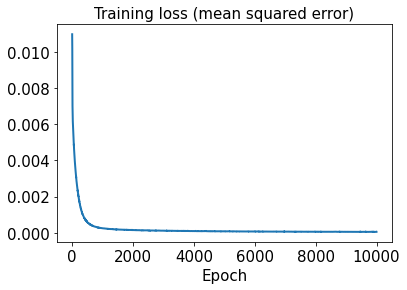

In [27]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

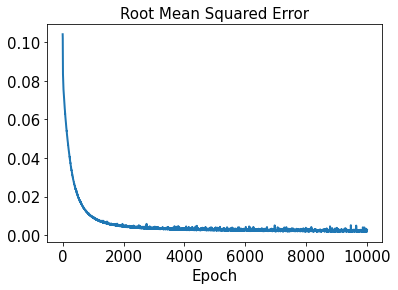

In [28]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [29]:
test_results = sd.evaluate(x_train)

13/13 [==============================] - 0s 1ms/step - loss: 4.3420e-05 - rmse: 0.0000e+00


In [30]:
decoded_train = sd.predict(x_train)

In [31]:
decoded_test = sd.predict(x_test)

In [32]:
error_train_abs = np.abs(decoded_train - y_train)

In [33]:
error_test_abs = np.abs(decoded_test - y_test)

In [34]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.00053300685


In [35]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.10010483


In [36]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
#print(l2_error_train_list)

In [37]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
#print(l2_error_test_list)

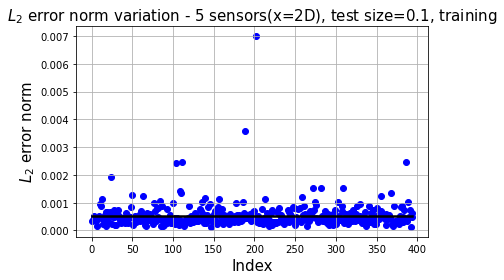

In [38]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - 5 sensors(x=2D), test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

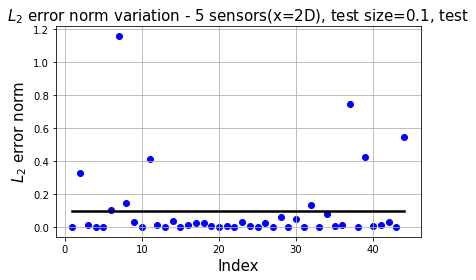

In [39]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - 5 sensors(x=2D), test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

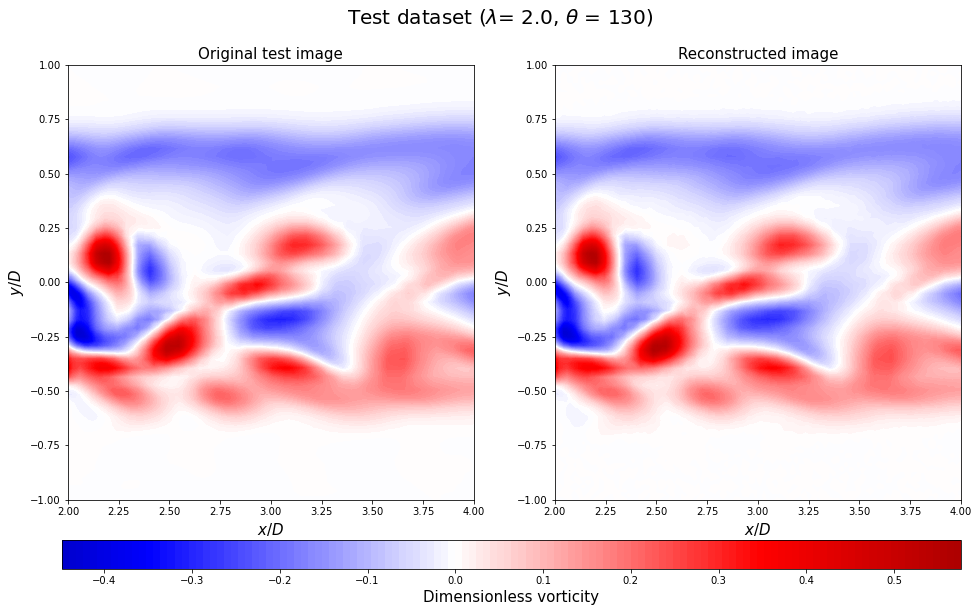

In [40]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

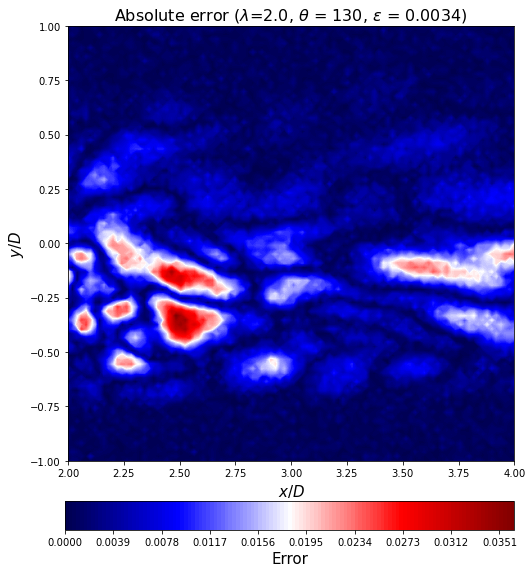

In [41]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()